In [3]:
import roboticstoolbox as rtb
import spatialmath as sm
from math import pi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def compute_angle_to_origin(transform_matrix):
    """
    Compute the angle needed to rotate the x-axis of a given transformation
    matrix so that it points towards the origin.

    Parameters:
    - transform_matrix: A 4x4 numpy array representing the homogeneous transformation matrix.

    Returns:
    - The angle in degrees that the x-axis of the transformed frame needs to be
      rotated by to point towards the origin.
    """
    # Extract the translation components (P_x, P_y) from the matrix
    P_x, P_y = transform_matrix[0, 3], transform_matrix[1, 3]
    
    # Calculate the angle between the vector pointing from the frame's current position
    # to the origin and the global x-axis. This uses atan2 and is adjusted by 180 degrees
    # to account for the direction towards the origin.
    angle_to_origin = np.degrees(np.arctan2(-P_y, -P_x))
    
    # Calculate the initial orientation of the frame's x-axis relative to the global x-axis.
    # This is the angle of rotation about the z-axis that has already been applied to the frame.
    # We use the elements of the rotation matrix to find this angle.
    R11, R21 = transform_matrix[0, 0], transform_matrix[1, 0]
    initial_orientation = np.degrees(np.arctan2(R21, R11))
    
    # Compute the additional rotation needed from the frame's current orientation.
    # This is the difference between the angle to the origin and the frame's initial orientation.
    additional_rotation = angle_to_origin - initial_orientation
    
    # Normalize the result to the range [-180, 180]
    additional_rotation = (additional_rotation + 180) % 360 - 180
    
    return additional_rotation


T1 = sm.SE3(4,0,0) * sm.SE3.Rz(30, 'deg') * sm.SE3.Ry(10, 'deg')

plt.figure()
sm.SE3().plot(frame='0', dims=[-5, 5], color='black')
T1.plot(frame='1', color='red')
plt.grid(True)
plt.show()


Angle to origin: 150.00 degrees


<Figure size 640x480 with 0 Axes>

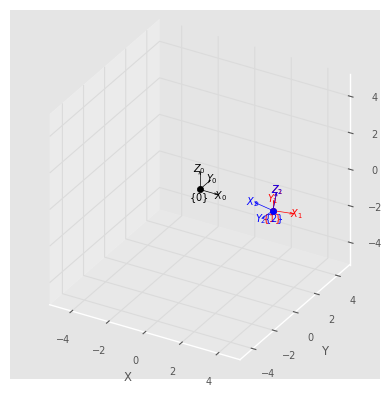

In [125]:
alpha = compute_angle_to_origin(np.array(T1))

print(f"Angle to origin: {alpha:.2f} degrees")

# create a new SE3 object that is a rotation of T1 about the Z-axis by theta
T2 = T1 * sm.SE3.Rz(np.deg2rad(alpha))

plt.figure()
sm.SE3().plot(frame='0', dims=[-5, 5], color='black')
T1.plot(frame='1', color='red')
T2.plot(frame='2', color='blue')
plt.grid(True)
plt.show()





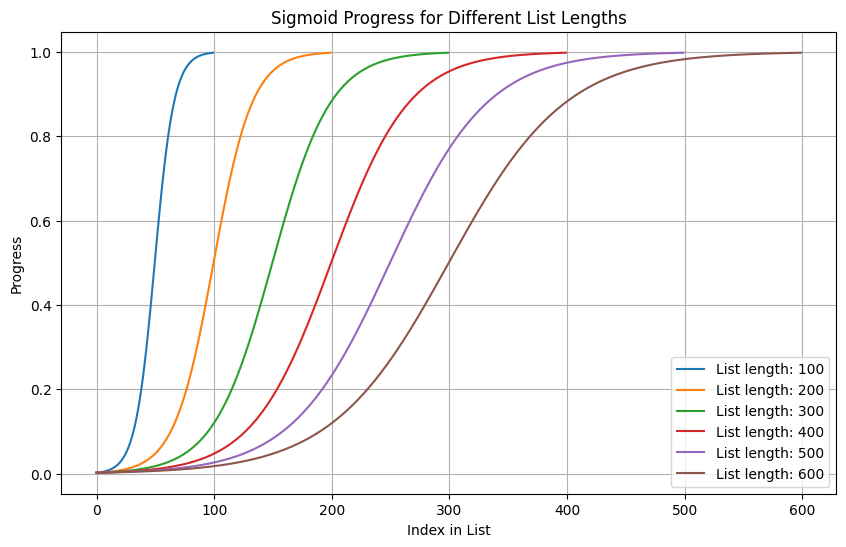

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_progress(length):
    x = np.linspace(-6, 6, length)
    return 1 / (1 + np.exp(-x))

def plot_sigmoid_progress(list_lengths):
    plt.figure(figsize=(10, 6))
    for length in list_lengths:
        progress = sigmoid_progress(length)
        plt.plot(progress, label=f'List length: {length}')
    
    plt.title('Sigmoid Progress for Different List Lengths')
    plt.xlabel('Index in List')
    plt.ylabel('Progress')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
list_lengths = [100, 200, 300, 400, 500, 600]
plot_sigmoid_progress(list_lengths)

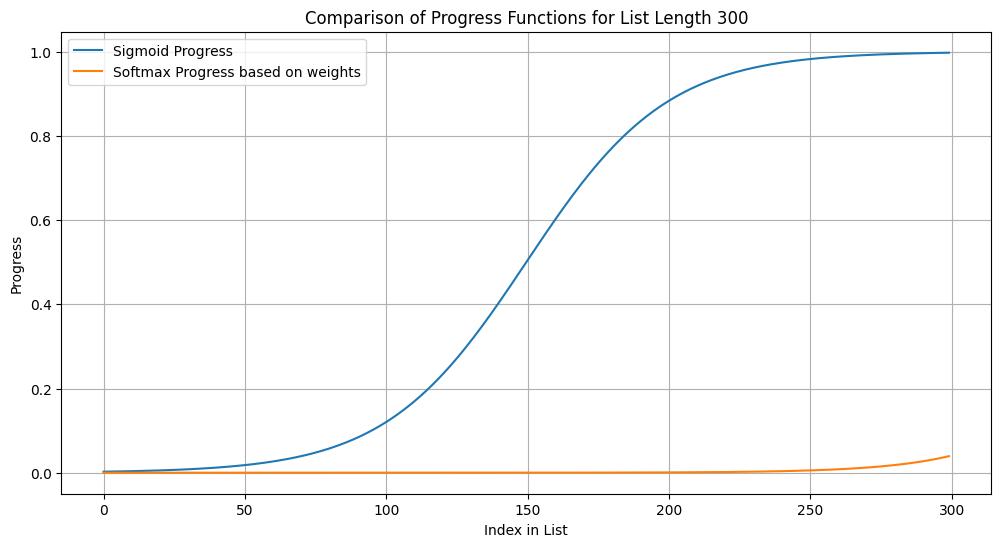

: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def softmax_progress(weights):
    e_x = np.exp(weights - np.max(weights))  # Subtract max for numerical stability
    return e_x / e_x.sum()

def plot_progress_comparison(list_length):
    # Sigmoid
    sigmoid_values = sigmoid_progress(list_length)

    # Softmax - here using the same linspace values as "weights" for simplicity
    weights = np.linspace(-6, 6, list_length)
    softmax_values = softmax_progress(weights)

    plt.figure(figsize=(12, 6))
    plt.plot(sigmoid_values, label='Sigmoid Progress')
    plt.plot(softmax_values, label='Softmax Progress based on weights')
    plt.title(f'Comparison of Progress Functions for List Length {list_length}')
    plt.xlabel('Index in List')
    plt.ylabel('Progress')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_progress_comparison(300)
